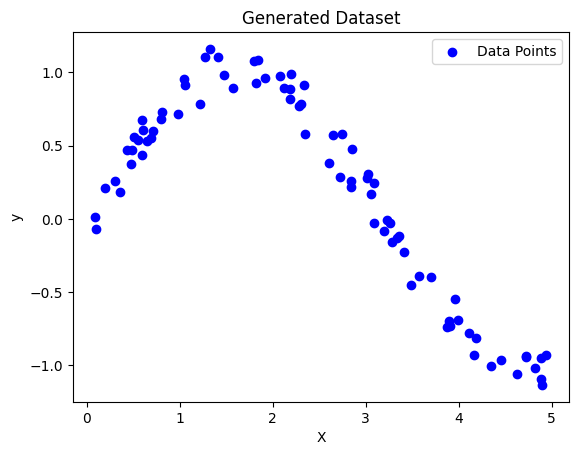

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


C:\Users\devpa\AppData\Local\Temp\ipykernel_5044\2324089536.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(diff @ diff.T / (-2.0 * tau ** 2))
C:\Users\devpa\AppData\Local\Temp\ipykernel_5044\2324089536.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i] @ local_weight(xmat[i], xmat, ymat, tau)


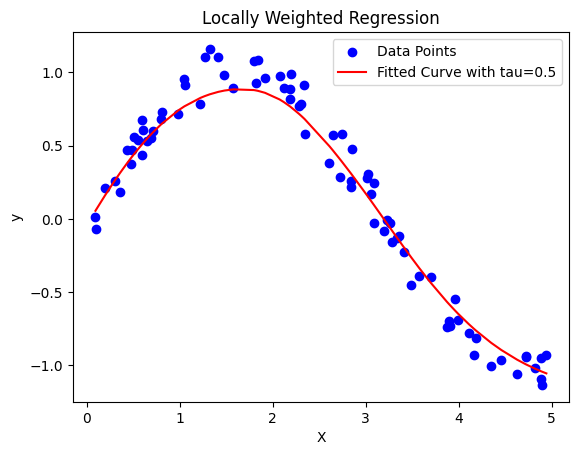

In [7]:
def kernel(point, xmat, tau):
    m, n = np.shape(xmat)
    weights = np.eye(m)
    for j in range(m):
        diff = point - xmat[j]
        weights[j, j] = np.exp(diff @ diff.T / (-2.0 * tau ** 2))
    return weights

def local_weight(point, xmat, ymat, tau):
    weights = kernel(point, xmat, tau)
    theta = np.linalg.pinv(xmat.T @ weights @ xmat) @ xmat.T @ weights @ ymat
    return theta

def local_weighted_regression(xmat, ymat, tau):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] @ local_weight(xmat[i], xmat, ymat, tau)
    return ypred.flatten()  


X_bias = np.c_[np.ones((X.shape[0], 1)), X]

tau = 0.5

ypred = local_weighted_regression(np.mat(X_bias), np.mat(y).T, tau)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, ypred, color='red', label='Fitted Curve with tau={}'.format(tau))
plt.title("Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


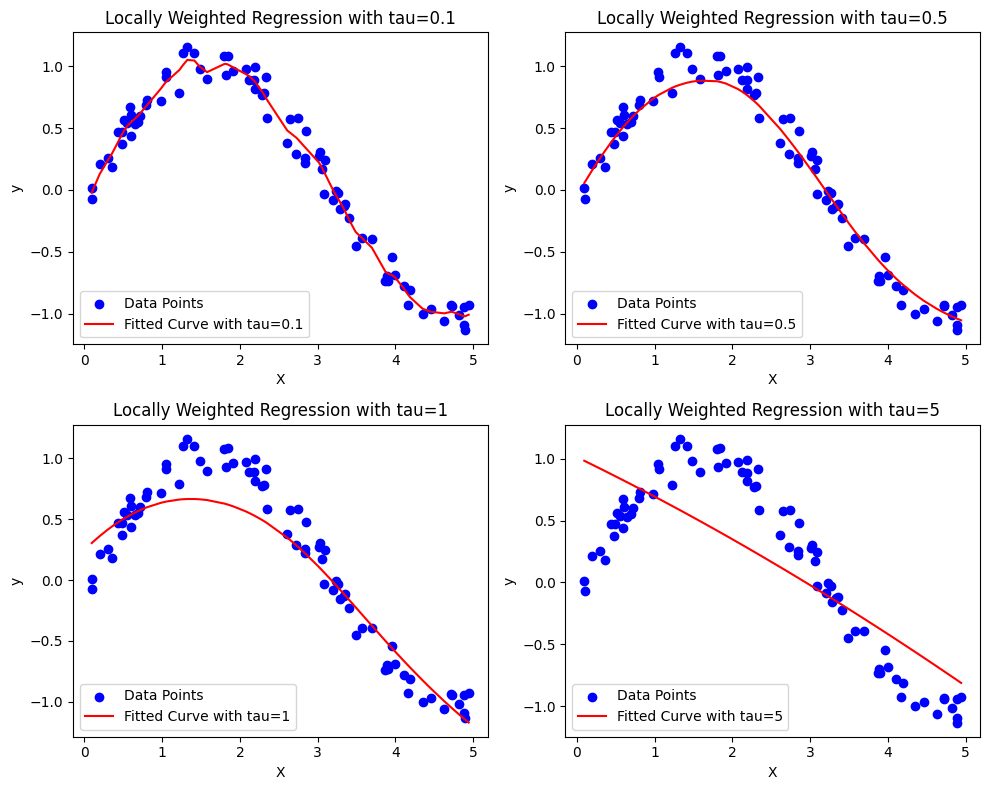

In [10]:
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

taus = [0.1, 0.5, 1, 5]

plt.figure(figsize=(10, 8))

for i, tau in enumerate(taus):
    ypred = local_weighted_regression(X_bias, y, tau)
    plt.subplot(2, 2, i+1)
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, ypred, color='red', label='Fitted Curve with tau={}'.format(tau))
    plt.title("Locally Weighted Regression with tau={}".format(tau))
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.tight_layout()
plt.show()
